# **Mid-Term Summative Assessment — Data Science Fundamentals**

- **Duration:** approx 1-3 hours per exercise (5-15 hours of work)
- **Format:** Individual coursework, submitted via Cortex and GitHub
- **Weight:** 30% of module grade
- **Dataset:** `attendance_anonymised.csv`

---

### 🎯 **Learning Outcomes**

By completing this assessment, you will demonstrate your ability to:

* Manage a Python data-science project using Git and GitHub.
* Import, clean, and transform a real-world dataset using `pandas`.
* Visualise data using `matplotlib`/`seaborn`.
* Build and run a simple interactive app with `pyShiny`.
* Perform and interpret a basic statistical analysis (correlation or regression).

### **💡 Tips**

* Always work from an **active virtual environment**.
* Keep your notebook clean and readable.
* Commit after each week’s exercise (recommended but not marked)
* Use `requirements.txt` to ensure reproducibility.

## 📘 Instructions

### **Exercise 1 — Project Setup (Version Control & Environment)**


1. Go to github.com and create a **new empty GitHub repository** on your Github account (no README, .gitignore, or license). 
   > *!Ensure the repo is public.*
2. Copy the repository URL and paste it below

https://github.com/eddierose42/individual-summative



3. In your terminal, navigate to a local folder and run `git clone`:

   ```bash
   cd ./datascience2025/ 
   git clone <your_repo_url>
   ```
   > Tips: 
   > 1. Replace `./datascience2025/` with a local path of your choice
   > 2. replace <your_repo_url> with the url you copied from Github, e.g. https://github.com/user/repo-url. 
   
   This command will download the remote Github repo to the local path. It will create a folder on your machine (e.g. `./datascience2025/<assessment_project_repo>/`) linked to the remote folder on Github.
4. Inside this folder, create:

   * `requirements.txt` — include all packages needed for the project (you may copy the one used in class).
   * `README.md` — write exactly:

     ```
     Hello world! I love summative assessments.
     ```
5. Stage and commit both files:

   ```bash
   git add .
   git commit -m "Initial commit with requirements and readme. I really love summatives."
   git push
   ```
   > If you prefer using the VS Code user interface to push your commit, please feel free. 

✅ **Checkpoint:** Refresh your repository on GitHub. It should show both files.



### **Exercise 2 — Data Cleaning & Exploration**



1. Load `attendance_anonymised.csv` using `pandas`.



In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("attendance_anonymised.csv")

2. Describe the dataset using inbuilt functions such as `.head()`, `.info()`, `.describe()`.


In [132]:
print("DATAFRAME OVERVIEW")
display(df.head(3))

print("DESCRIPTIVE STATISTCS")
display(df.describe().round(1))

print("NULL VALUES PER COLUMN")
display(df.isna().sum())


DATAFRAME OVERVIEW


,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,Planned End Date,is Positive,Postive Marks,Negative Marks,Usage Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,2023-11-01,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,2023-05-01,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,2023-05-07,N,0,0,A


DESCRIPTIVE STATISTCS


,Person Code,Unit Instance Code,Calocc Code,Register Event ID,Object ID,Register Event Slot ID,Postive Marks,Negative Marks
count,17053.0,17053.0,17053.0,17053.0,17053.0,17053.0,17053.0,17053.0
mean,258.2,1252.7,2023.9,495.8,504.8,572.4,0.7,0.7
std,146.9,530.6,0.8,292.0,275.2,313.9,0.5,0.4
min,1.0,4.0,2023.0,1.0,7.0,0.0,0.0,0.0
25%,146.0,840.0,2023.0,223.0,267.0,297.0,0.0,0.0
50%,265.0,1306.0,2024.0,515.0,504.0,574.0,1.0,1.0
75%,384.0,1749.0,2025.0,788.0,733.0,839.0,1.0,1.0
max,498.0,1945.0,2025.0,984.0,984.0,1124.0,1.0,1.0


NULL VALUES PER COLUMN


Person Code                0
Unit Instance Code         0
Calocc Code                0
Surname                    0
Forename                   0
Long Description           0
Register Event ID          0
Object ID                  0
Register Event Slot ID     0
Planned Start Date         0
Planned End Date           0
is Positive               15
Postive Marks              0
Negative Marks             0
Usage Code                15
dtype: int64

3. Drop the `Planned End Date` column.


In [133]:
df.drop("Planned End Date", axis=1, inplace=True)

4. Rename the columns exactly as follows:

   | Old                    | New             |
   | ---------------------- | --------------- |
   | Person Code            | Person Code     |
   | Unit Instance Code     | Module Code     |
   | Calocc Code            | Year            |
   | Surname                | Surname         |
   | Forename               | Forename        |
   | Long Description       | Module Name     |
   | Register Event ID      | Event ID        |
   | Object ID              | Object ID       |
   | Register Event Slot ID | Event Slot ID   |
   | Planned Start Date     | Date            |
   | is Positive            | Has Attended    |
   | Postive Marks          | Attended        |
   | Negative Marks         | NotAttended     |
   | Usage Code             | Attendance Code |



In [134]:
mapping = {
    "Person Code": "Person Code",
    "Unit Instance Code": "Module Code",
    "Calocc Code": "Year",
    #"Surname": "Surname",
    #"Forename": "Forename",
    "Long Description": "Module Name",
    "Register Event ID": "Event ID",
    #"Object ID": "Object ID",
    "Register Event Slot ID": "Event Slot ID",
    "Planned Start Date": "Date",
    "is Positive": "Has Attended",
    "Postive Marks": "Attended",
    "Negative Marks": "NotAttended",
    "Usage Code": "Attendance Code"
}

df.rename(mapping, axis=1, inplace=True)

5. Convert `Date` to a pandas timestamp. 
   > tip: use `pd.to_datetime()`

In [135]:
df["Date"] = pd.to_datetime(df["Date"])

6. Filter the DataFrame on **one specific module** (your choice) and plot its **attendance rate over time**
   (x = Date, y = the module's average attendance).



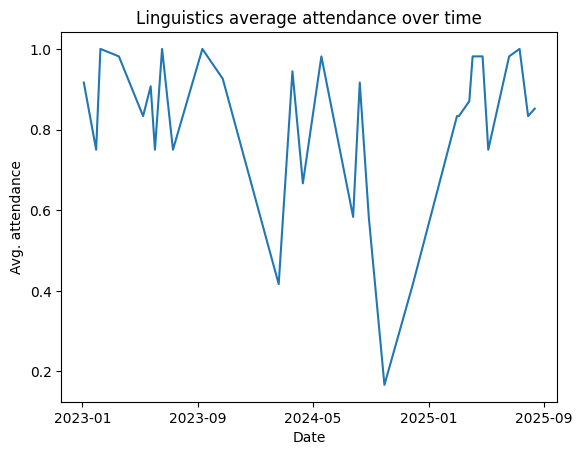

In [136]:
data = df[df["Module Name"] == "Linguistics"][["Date", "Attended"]].groupby("Date").mean()
plt.plot(data);

# adjust labels on the x-axis so the graph is readable
values, labels = plt.xticks()
new = [[], []]
for i in range(0, len(values), 2):
    new[0].append(values[i])
    new[1].append(labels[i])
plt.xticks(new[0], new[1]);

plt.xlabel("Date")
plt.ylabel("Avg. attendance")
plt.title("Linguistics average attendance over time")
plt.show()

7. **[For L6 students only]** Add a column, titled "Student Overall Attendance", with the average attendance for the student. Add a column, titled "Standardised Student Overall Attendance", with the z-scores of "Student Overall Attendance".

In [137]:
data = df[["Person Code", "Attended"]].groupby("Person Code").mean()["Attended"]
df["Student Overall Attendance"] = data[df["Person Code"].values].values
zscores = (data - data.mean()) / data.std()
df["Standardised Student Overall Attendance"] = zscores[df["Person Code"].values].values
df.head(3)


,Person Code,Module Code,Year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code,Student Overall Attendance,Standardised Student Overall Attendance
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O,0.875000,0.503163
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A,0.875000,0.503163
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A,0.216216,-2.553278


✅ **Checkpoint:** Cleaned DataFrame and a line or bar plot of attendance over time for one module.

---



### **Exercise 3 — Make it Shiny**



1. Create a file called `app.py`.
2. Build a minimal Shiny app that only displays the plot you created in the previous exercise.
3. Run the app locally using this terminal command:

   ```bash
   shiny run --reload --launch-browser app.py
   ```
   > if your terminal is not in the same folder where the `app.py` file is, you will need to specify the correct path, e.g. `shiny run --reload --launch-browser /path/to/my/app.py`

4. **[For L6 students only]** Enhance the app with a title and at least one more UI element. E.g., you could enhance the app with interactivity (e.g. allow the user to select the module to plot).

✅ **Checkpoint:** The app runs without errors and displays the plot from Exercise 2 in a browser.

---

### **Exercise 4 — Comparing Modules**



1. Compute the **mean** and **standard deviation** of attendance per module using pandas `groupby`. Consult the documentation if needed.


In [153]:
df_compare = df[["Module Name", "Attended"]].groupby("Module Name")["Attended"]
df_compare.describe()[["mean", "std"]].round(2)

,mean,std
Module Name,,
Algorithms,0.74,0.44
Arabic,0.75,0.43
Arts & Crafts,0.61,0.49
Biology,0.62,0.49
Biomedical Engineering,0.65,0.48
Business Intelligence,0.78,0.42
Chemistry,0.68,0.47
Cloud Computing,0.84,0.37
Creative Writing,0.97,0.18


2. Create a `seaborn.barplot` of mean attendance per module with 95% confidence intervals.


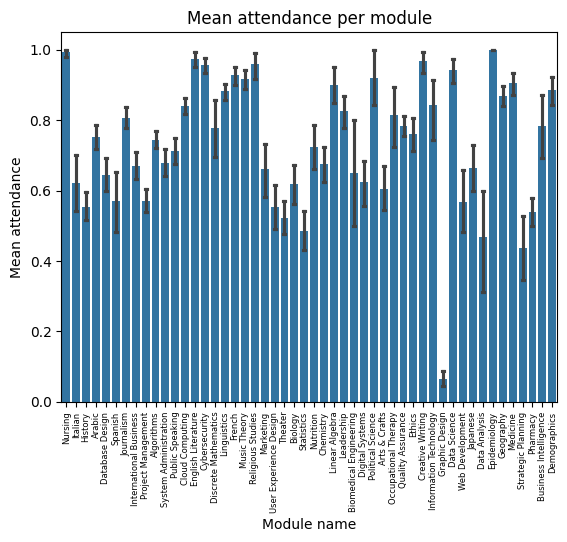

In [139]:
sns.barplot(x="Module Name", y="Attended", data=df, capsize=0.2)
plt.xlabel("Module name")
plt.ylabel("Mean attendance")
plt.xticks(fontsize=6, rotation=90)
plt.title("Mean attendance per module")
plt.show()

3. Write a short interpretation (2–3 sentences) explaining what the plot and error bars show.

<span style="color:orange">

The bars show the attendance rate for each module, which is the mean average of attendance for all classes across the module. The confidence intervals show the range of where the real average attendance rate could be; there is a 95% probability that the true attendance rate falls between them.
</span>

✅ **Checkpoint:** My notebook and/or my Shiny app show a barplot with error bars, one bar per module (x-axis), where the height of the bar is the module's attendance rate (y-axis).

---



### **Exercise 5 — Attendance Relationships**



1. Answer the question: **Do students with low overall attendance tend to attend modules that have low attendance?**.

2. **[For L5 students only]**. Choose between a correlation analysis or a linear regression analysis to answer the question.

3. **[For L6 students only]** Run both correlation analysis and linear regression analysis to answer the same question. Do they tell the same story?

> Tips:
> 1. Compute the mean attendance rate of each module. Can you re-use some of the `groupby` code you wrote above?
> 2. For each module, compute the average overall attendance of the students who attended that module.
> 3. Correlation and linear regression can both help you answer the question. 
> 4. Report main statistic and p-value(s).


CORRELATION:
	R2: 0.683	p-value: 4.6863158878295204e-08

LINEAR REGRESSION:
	R2: 0.466	p-value: 4.68631588782946e-08


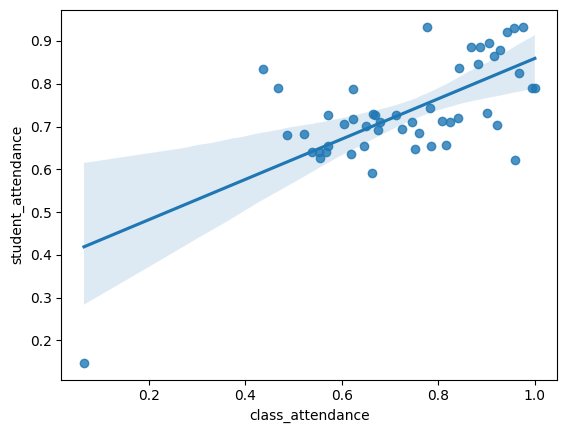

In [193]:
import statsmodels.api as stats
import scipy.stats

data = df[["Module Name", "Attended", "Student Overall Attendance"]].groupby("Module Name").mean()
data.rename({"Attended": "class_attendance", "Student Overall Attendance": "student_attendance"}, axis=1, inplace=True)
sns.regplot(x="class_attendance", y="student_attendance", data=data)

## CORRELATION
result = scipy.stats.pearsonr(x=data["class_attendance"], y=data["student_attendance"])
print("CORRELATION:\n\tR2: {}\tp-value: {}\n".format(round(result.statistic, 3), result.pvalue, 3))

## LINEAR REGRESSION
model = stats.formula.ols(formula = "class_attendance ~ student_attendance", data=data).fit()
print("LINEAR REGRESSION:\n\tR2: {}\tp-value: {}".format(round(model.rsquared, 3), model.pvalues["student_attendance"]))

<span style="color:orange">

Yes, there is a statistically significant correlation between student attendance and class attendance (p<0.01). According to the linear regression, ~47% of the variability in the data can be explained this way, meaning that an association is very likely to exist but it doesn't fully explain the data. The linear regression analysis and correlation analysis tell a simliar story but have different R-sqaured values.

</span>

✅ **Checkpoint:** Table or printout showing correlation or regression results.

# THE END!